# Parsing Dates

## 0. Modules

我們將使用一個包含 2007 年至 2016 年間發生的山崩資訊的資料集。  
在接下來的練習中，你將把你新學的技能應用到一個全球地震的資料集上。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

# read in our data
landslides = pd.read_csv("catalog.csv")

# set seed for reproducibility
np.random.seed(0)

## 1. Check the data type of our date column

我們首先查看數據的前五行。

In [2]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


我們將使用山崩資料框中的「日期」欄位。  
讓我們確保它看起來真的包含了日期。

In [3]:
# print the first few rows of the date column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


沒錯，這些是日期！但僅僅因為人能夠認出這些是日期，並不意味著 Python 知道它們是日期。  
注意，在 `head()` 輸出的底部，你可以看到它顯示這一欄位的數據類型是「物件」。

**Pandas 使用「物件」資料類型來儲存各種類型的資料，  
但當你看到一個欄位的資料類型是「物件」時，通常意味著其中包含了字串。**

如果你查看這裡的 pandas 資料類型文件，你會注意到還有一個特定的 `datetime64` 資料類型。  
因為我們欄位的資料類型是物件，而不是 `datetime64`，我們可以知道 Python 並不知道這個欄位包含的是日期。

我們也可以不列印前幾行，只查看某個欄位的資料類型：

In [4]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

你可能需要查閱 [numpy 的文件](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.dtype.kind.html#numpy.dtype.kind)來匹配字母代碼與物件的資料類型。  
"O" 是「物件」的代碼，所以我們可以看到這兩種方法給我們提供了相同的資訊。

## 2. Convert our date columns to datetime

現在我們知道我們的日期欄位並沒有被識別為日期，是時候將其轉換成為被識別為日期的格式了。  
這被稱為「解析日期」(parsing dates)，因為我們接收一個字串並識別其組成部分。

我們可以使用稱為**「strftime指令」**來確定我們日期的格式，你可以在這個[連結](https://strftime.org/)找到更多資訊。  
基本概念是你需要指出日期的哪些部分位於哪裡以及它們之間的標點是什麼。  
日期可能包括許多部分，但最常見的包括 %d 表示日，%m 表示月，%y 表示兩位數的年份，而 %Y 則表示四位數的年份。

Some examples:  

- 1/17/07 has the format "%m/%d/%y"
- 17-1-2007 has the format "%d-%m-%Y"

回顧山崩資料集中「日期」欄位的頭幾行，我們可以看到其格式為「月/日/兩位數年份」，  
因此我們可以使用與第一個例子相同的語法來解析我們的日期：

In [5]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

現在當我檢查新欄位的前幾行時，我可以看到資料類型是 `datetime64`。  
我還可以看到我的日期已經稍微重新排列，以便它們符合 datetime 物件的預設順序（年-月-日）。

In [6]:
# print the first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

現在我們的日期已經正確解析，我們可以以有用的方式與它們互動。

---
- **如果我遇到多種日期格式的錯誤怎麼辦？**  
雖然我們在這裡指定了日期格式，但有時你會遇到一個欄位中有多種日期格式的錯誤。  
如果發生這種情況，你可以讓 pandas 嘗試推斷正確的日期格式應該是什麼。你可以這樣做：

`landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)`

- **為什麼不總是使用 `infer_datetime_format = True`？**  
有兩個主要原因不要總是讓 pandas 猜測時間格式。  
第一個原因是 pandas 並不總是能夠確定正確的日期格式，尤其是當有人在數據輸入時變得創造性時。  
第二個原因是它比指定日期的確切格式要慢得多。

## 3. Select the day of the month

現在我們有了一個解析過的日期欄位，我們可以提取像是山崩發生的月份中的哪一天等資訊。

In [7]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

如果我們嘗試從原始的「日期」欄位獲取相同的資訊，  
我們會遇到一個錯誤：`AttributeError: Can only use .dt accessor with datetimelike values.`  
這是因為 `dt.day` 不知道如何處理資料類型為「物件」的欄位。  
即使我們的資料框中包含日期，我們也必須先解析它們，然後才能以有用的方式與它們互動。

## 4. Plot the day of the month to check the date parsing

解析日期時最大的危險之一是將月份和日期混淆。`to_datetime()` 函數確實有非常有幫助的錯誤訊息，  
但仔細檢查我們提取的月份中的日期是否合理並無妨。

為了做到這一點，讓我們繪製一個月份中日期的直方圖。  
我們預期它的值在1到31之間，並且由於沒有理由假設山崩在月份的某些日子比其他日子更常見，  
所以分佈應該相對均勻。（由於不是所有月份都有31天，所以31日會有所下降。）  
讓我們看看是否如此：

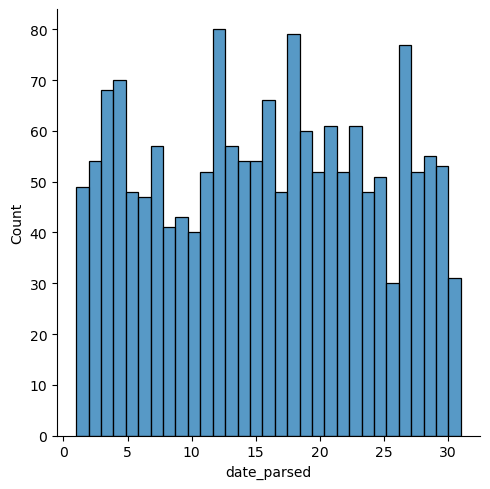

In [8]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# Ignore Warnings 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# plot the day of the month
sns.displot(day_of_month_landslides, kind="hist", kde=False, bins=31)